<a href="https://colab.research.google.com/github/foreveryfs/Yang_Fengshuo-ARIN5102/blob/main/ARIN5102_2025_26_Fall_Semester_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem 1.**
* **<font color='red'>Analysis for the first part</font>**:actually for a robot don't know where its initial position is,which corner it will go for should be decided by the designer.

  We consider:
  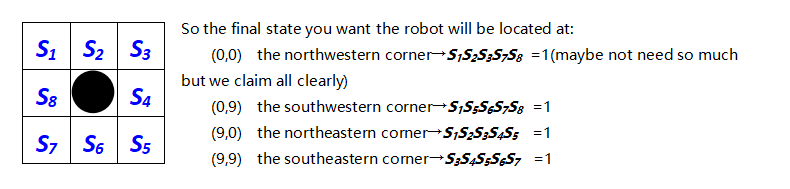

  After that we take **(0,0)** as an example and simplify the solution;<br>
  **<font color='red'>production system for the first part</font>**: s2s8 → End,  ¬s2 → north,  ¬s8 → west<br>
  simple but useful

*  Here is a question:Consider a 10x10 grid with an obstacle occupying the three center cells in the middle row: (4; 5);(5; 5);(6; 5), and a robot with the specification as:eight sensors(get 1 when the corresponding cell is a boundary or an obstacle,get 0 otherwise) and four actions(NSWE).<br>
Design a python program to control the robot to find the nearest one of the four corners and go to it.Whenever it goes to a corner,the move will stop.Please use the following states:<br>
-sense() means returns the list of eight binary sensor readings [s1,……,s8];<br>
-north() means send"move north one step" to the robot. Similarly for south(),east(),west(),and noop() means"no one step".<br>
Need a program can run directly with generating a random initial location for the robot,and must show the state of movement,the coordinate and the state of sensors every single step(including the final time when it arrived).<br>
(you can use this prompts to generate a correct code)






## **Problem 2.**
(x1 + x2)(¬x1 + x3) = 0 +x1x3 + x2¬x1 +x2x3<br><br>the truth table<br>
|x1|x2|x3|(x1 + x2)(¬x1 + x3)|
|--|--|--|-----------------------|
|0|0|0|0|
|0|0|1|0|
|0|1|0|1|
|0|1|1|1|
|1|0|0|0|
|1|0|1|1|
|1|1|0|0|
|1|1|1|1|

<br><font color='red'>for a single TLU,it fails</font><br>
<font color='red'>for a Two-Layer TLU,a solution may be</font>:
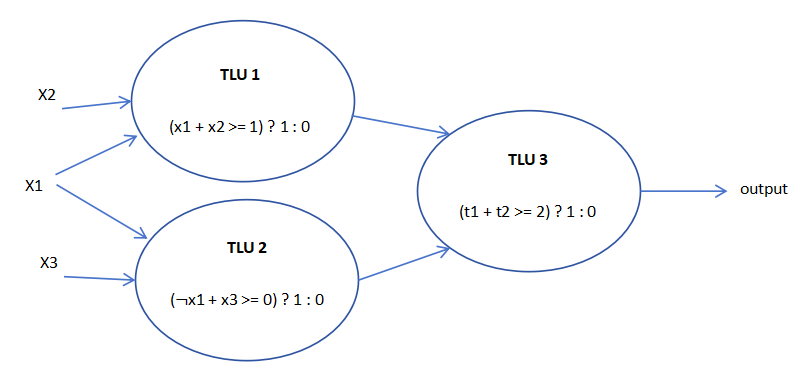


## **Problem 3.**
Since
1.   θ < 0
2.   w3 < 0
1.   w8 < 0
2.   w1 > θ,w8 > θ but w1+w3+w8 < θ
<br><br>




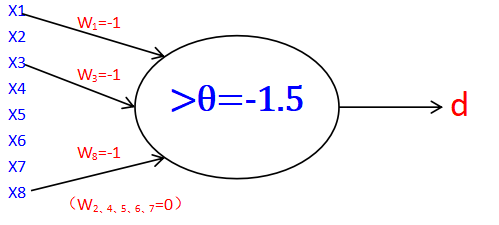

**<font color='green'>means (x1 + x3 + x8<=1)?1:0</font>**

## **Problem 4.**



1. The fitness function measures how well a perceptron (w1, ..., wn, θ) classifies the training examples.The fitness is calculated as the number of correctly classified examples divided by the total number of examples between 0 and 1,where 1 means perfect classification.
2. The crossover operator used is a two - point crossover.For two parent perceptrons P1 and P2 we randomly selects two distinct indices i and j(1 ≤ i < j ≤ n + 1, where n+1 means θ).
3. Just copy one parent perceptron both weights and the threshold.
4. Actually a Gaussian mutation operator.The well-known normal distribution joined a random value.
5. The size of the initial generation is init_size equal to 200.It generated by randomly initializing the weights wi and the threshold θ both from a uniform distribution U(-1, 1).
6. For one,the evolution stops if a perceptron with a fitness of at least 0.96 is got(not too fast or too slow).For another,we use a limitation number equal to 100 for the generation.
7. The system usually terminated early between generation 20 and 40 with a great fitness.Then we test the best perceptron performance with training set and made correct predictions for most of them.


In [ ]:
import numpy as np
import random
import pandas as pd


class Perceptron:
    def __init__(self, num_features):
        # Initialize weights and threshold randomly between(-1,1)
        self.weights = np.random.uniform(-1, 1, num_features)
        self.threshold = np.random.uniform(-1, 1)

    def predict(self, x):
        """Make a prediction using the perceptron"""
        activation = np.dot(self.weights, x)
        return 1 if activation >= self.threshold else 0


def fitness(perceptron, training_set):
    """Calculate fitness as accuracy on training set"""
    correct = 0
    for example in training_set:
        x = example[:-1]
        label = example[-1]
        if perceptron.predict(x) == label:
            correct += 1
    return correct / len(training_set)


def crossover(parent1, parent2):
    """Two-point crossover between two perceptrons"""
    num_features = len(parent1.weights)
    child = Perceptron(num_features)

    # Combine weights and threshold for crossover
    p1_genes = np.concatenate([parent1.weights, [parent1.threshold]])
    p2_genes = np.concatenate([parent2.weights, [parent2.threshold]])

    # Select two random crossover points
    point1 = random.randint(0, num_features)
    point2 = random.randint(point1, num_features + 1)

    # Create child genes
    child_genes = []
    for i in range(len(p1_genes)):
        if i < point1 or i > point2:
            child_genes.append(p1_genes[i])
        else:
            child_genes.append(p2_genes[i])

    # Split back into weights and threshold
    child.weights = np.array(child_genes[:-1])
    child.threshold = child_genes[-1]
    return child


def copy_operator(parent):
    """Copy a parent perceptron exactly"""
    num_features = len(parent.weights)
    child = Perceptron(num_features)
    child.weights = np.copy(parent.weights)
    child.threshold = parent.threshold
    return child


def mutate(perceptron, mutation_rate=0.1, sigma=0.1):
    """Gaussian mutation operator"""
    # Mutate weights
    for i in range(len(perceptron.weights)):
        if random.random() < mutation_rate:
            perceptron.weights[i] += np.random.normal(0, sigma)

    # Mutate threshold
    if random.random() < mutation_rate:
        perceptron.threshold += np.random.normal(0, sigma)

    return perceptron


def evolve_perceptrons(training_set, num_features, init_size=200,
            generations=100, mutation_rate=0.1,
            crossover_rate=0.7, elitism_rate=0.1):
    """Main evolution function"""
    # Initialize population
    population = [Perceptron(num_features) for _ in range(init_size)]
    best_fitness_history = []

    for gen in range(generations):
        # Evaluate fitness
        fitness_scores=[fitness(p,training_set) for p in population]
        best_fitness = max(fitness_scores)
        best_fitness_history.append(best_fitness)

        print(f"Generation {gen}: BestFitness = {best_fitness:.4f}")

        # Check termination condition (fitness good enough)
        if best_fitness >= 0.96:
            print(f"Early termination now!")
            break

        # Select parents using tournament selection
        new_population = []

        # Elitism: preserve top performers
        num_elite = int(elitism_rate * init_size)
        elite_indices = np.argsort(fitness_scores)[-num_elite:]
        for i in elite_indices:
            new_population.append(copy_operator(population[i]))

        # Generate remaining individuals
        while len(new_population) < init_size:
            # Select two parents
            parent1 = tournament_selection(population,
                            fitness_scores)
            parent2 = tournament_selection(population,
                            fitness_scores)

            # Apply crossover or copy
            if random.random() < crossover_rate:
                child = crossover(parent1, parent2)
            else:
                # Randomly choose one parent to copy
                child = copy_operator(parent1 if random.random() < 0.5
                                 else parent2)

            # Apply mutation
            child = mutate(child, mutation_rate)

            new_population.append(child)

        population = new_population

    # Find best perceptron
    best_index =np.argmax([fitness(p,training_set) for p in population])
    return population[best_index], best_fitness_history


def tournament_selection(population, fitness_scores, tournament_size=3):
    """Select a parent using tournament selection"""
    indices = random.sample(range(len(population)), tournament_size)
    tournament_fitness = [fitness_scores[i] for i in indices]
    winner_index = indices[np.argmax(tournament_fitness)]
    return population[winner_index]


# Load the training set

df = pd.read_csv('gp-training-set-1.csv')
# Attention to your path!
training_set = [tuple(row) for row in df.values]

# Evolve a perceptron
best_perceptron, fitness_history = evolve_perceptrons(
    training_set,
    num_features=len(df.columns) - 1,
    init_size=200,
    generations=100
)

# Test the best perceptron
print("\nBest Perceptron Performance:")
correct_count = 0
for example in training_set:
    x = example[:-1]
    label = example[-1]
    pred = best_perceptron.predict(x)
    if pred == label:
        correct_count += 1
    print(f"Input: {x}, Actual: {label}, Predicted: {pred},{'Correct' if pred == label else 'Incorrect'}")

# Calculate and print the overall accuracy
accuracy = correct_count / len(training_set)
print(f"\nOverall Accuracy on Training Set: {accuracy * 100:.2f}%")

Generation 0: BestFitness = 0.7576
Generation 1: BestFitness = 0.7576
Generation 2: BestFitness = 0.8283
Generation 3: BestFitness = 0.8586
Generation 4: BestFitness = 0.8586
Generation 5: BestFitness = 0.8586
Generation 6: BestFitness = 0.8687
Generation 7: BestFitness = 0.8788
Generation 8: BestFitness = 0.9192
Generation 9: BestFitness = 0.9293
Generation 10: BestFitness = 0.9293
Generation 11: BestFitness = 0.9495
Generation 12: BestFitness = 0.9495
Generation 13: BestFitness = 0.9596
Generation 14: BestFitness = 0.9596
Generation 15: BestFitness = 0.9697
Early termination now!

Best Perceptron Performance:
Input: (np.float64(0.47), np.float64(0.54), np.float64(0.07), np.float64(0.51), np.float64(0.36), np.float64(0.98), np.float64(0.61), np.float64(0.54), np.float64(0.56)), Actual: 1.0, Predicted: 1,Correct
Input: (np.float64(0.48), np.float64(0.07), np.float64(1.0), np.float64(0.92), np.float64(0.55), np.float64(0.74), np.float64(0.89), np.float64(0.93), np.float64(0.14)), Actual